In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from PIL import Image
import tensorflow as tf
from tensorflow import keras

# import cv2
# from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical

# Import pre-trained models
from keras.applications.vgg16 import VGG16


In [2]:
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  13


# VGG-16

In [3]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model without the top layer (include_top=False)
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze all layers in the base VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Add a new classification layer on top of the pre-trained model
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='sigmoid')(x)

# Create the new model and compile it
model = keras.Model(inputs=vgg.input, outputs=x)
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [5]:
def pickle_to_set(setName):

    with open(setName,'rb') as f:

        set = pickle.load(f)

    print("dataset has been imported :)")

    return set



In [6]:
train_x = pickle_to_set('./train_resamp_x.pkl')
train_y = pickle_to_set('./train_resamp_y.pkl')

val_x = pickle_to_set('./val_resamp_x.pkl')
val_y = pickle_to_set('./val_resamp_y.pkl')


dataset has been imported :)
dataset has been imported :)
dataset has been imported :)
dataset has been imported :)


In [7]:
print(f"shape of train_x: {train_x.shape}")
print(f"shape of train_y: {train_y.shape}")
print(f"shape of val_x: {val_x.shape}")
print(f"shape of val_y: {val_y.shape}")

shape of train_x: (934, 32, 32, 3)
shape of train_y: (934,)
shape of val_x: (234, 32, 32, 3)
shape of val_y: (234,)


Epoch 1/10
829/829 [==============================] - 14s 16ms/step - loss: 0.6671 - accuracy: 0.9583 - val_loss: 0.4725 - val_accuracy: 0.9810
Epoch 2/10
829/829 [==============================] - 12s 15ms/step - loss: 0.4091 - accuracy: 0.9674 - val_loss: 0.3755 - val_accuracy: 0.9819
Epoch 3/10
829/829 [==============================] - 13s 15ms/step - loss: 0.2922 - accuracy: 0.9677 - val_loss: 0.2388 - val_accuracy: 0.9817
Epoch 4/10
829/829 [==============================] - 13s 15ms/step - loss: 0.2091 - accuracy: 0.9716 - val_loss: 0.1759 - val_accuracy: 0.9814
Epoch 5/10
829/829 [==============================] - 12s 15ms/step - loss: 0.1592 - accuracy: 0.9725 - val_loss: 0.1556 - val_accuracy: 0.9817
Epoch 6/10
829/829 [==============================] - 12s 15ms/step - loss: 0.1171 - accuracy: 0.9766 - val_loss: 0.1328 - val_accuracy: 0.9810
Epoch 7/10
829/829 [==============================] - 12s 15ms/step - loss: 0.1039 - accuracy: 0.9789 - val_loss: 0.1234 - val_accuracy:

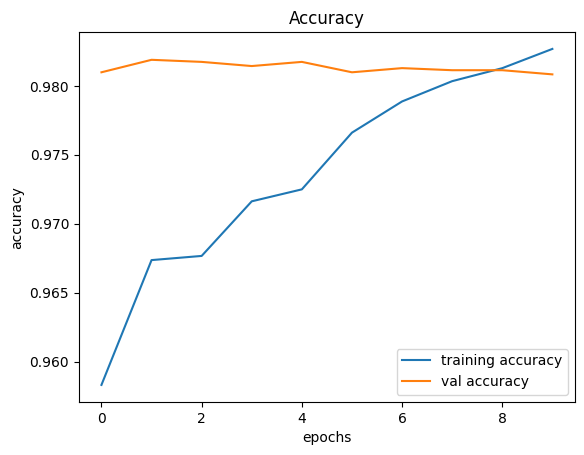

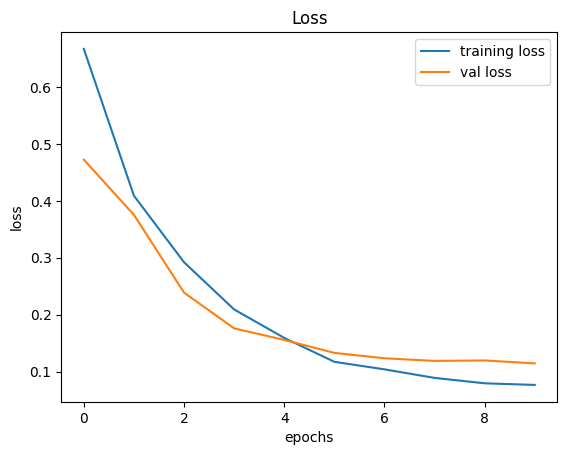

In [82]:
epoch = 10
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Train Model
history = model.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= (val_x, val_y))

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [85]:
# Save model
model.save("VGG-16.h5")

# VGG-16 with Augmented Data

In [94]:
data_augmentation = tf.keras.Sequential([                                    
  tf.keras.layers.RandomFlip('horizontal',
         input_shape=(32, 32, 3)),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomWidth(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomContrast(0.2)                                  
], name='data_augmentation')



In [96]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model without the top layer (include_top=False)
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze all layers in the base VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Add a new classification layer on top of the pre-trained model
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)  # Apply random data augmentation
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='sigmoid')(x)

# Create the new model and compile it
model_vgg_aug = keras.Model(inputs=vgg.input, outputs=x)
model_vgg_aug.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model_vgg_aug.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0  

Epoch 1/10
829/829 [==============================] - 13s 15ms/step - loss: 0.6123 - accuracy: 0.9582 - val_loss: 0.3778 - val_accuracy: 0.9813
Epoch 2/10
829/829 [==============================] - 12s 15ms/step - loss: 0.3615 - accuracy: 0.9674 - val_loss: 0.2895 - val_accuracy: 0.9811
Epoch 3/10
829/829 [==============================] - 13s 15ms/step - loss: 0.2581 - accuracy: 0.9690 - val_loss: 0.2376 - val_accuracy: 0.9813
Epoch 4/10
829/829 [==============================] - 13s 15ms/step - loss: 0.1819 - accuracy: 0.9723 - val_loss: 0.1655 - val_accuracy: 0.9805
Epoch 5/10
829/829 [==============================] - 13s 16ms/step - loss: 0.1405 - accuracy: 0.9749 - val_loss: 0.1502 - val_accuracy: 0.9808
Epoch 6/10
829/829 [==============================] - 13s 15ms/step - loss: 0.1195 - accuracy: 0.9777 - val_loss: 0.1362 - val_accuracy: 0.9811
Epoch 7/10
829/829 [==============================] - 13s 15ms/step - loss: 0.1002 - accuracy: 0.9795 - val_loss: 0.1279 - val_accuracy:

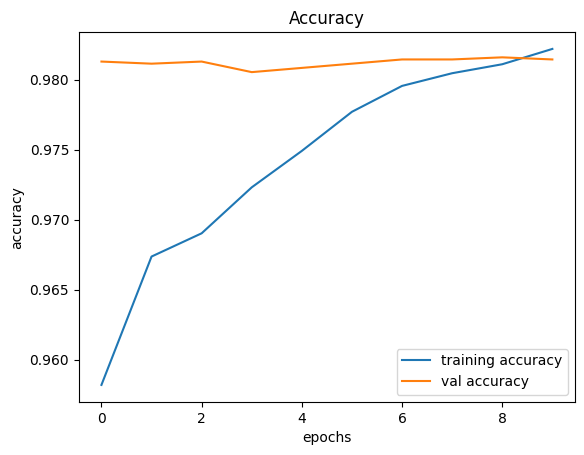

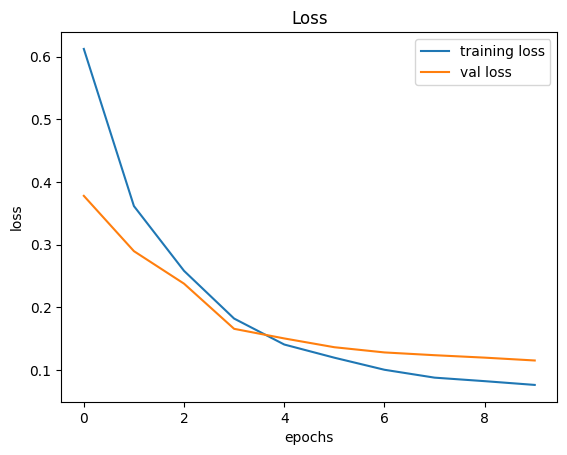

In [97]:
epoch = 10
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Train Model
history = model_vgg_aug.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= (val_x, val_y))

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [98]:
# Save model
model_vgg_aug.save("VGG-16_aug.h5")

# VGG-16 with Resampled Dataset

## Import resampled datasets

In [8]:
from tensorflow.keras.applications import VGG16

# Load the VGG16 model without the top layer (include_top=False)
vgg = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

# Freeze all layers in the base VGG16 model
for layer in vgg.layers:
    layer.trainable = False

# Add a new classification layer on top of the pre-trained model
x = Flatten()(vgg.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='sigmoid')(x)

# Create the new model and compile it
model_resamp = keras.Model(inputs=vgg.input, outputs=x)
model_resamp.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])
model_resamp.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

Epoch 1/20
30/30 [==============================] - 4s 37ms/step - loss: 0.7182 - accuracy: 0.5064 - val_loss: 0.6434 - val_accuracy: 0.6752
Epoch 2/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6632 - accuracy: 0.5942 - val_loss: 0.6031 - val_accuracy: 0.7137
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6307 - accuracy: 0.6531 - val_loss: 0.5842 - val_accuracy: 0.7179
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6176 - accuracy: 0.6670 - val_loss: 0.5718 - val_accuracy: 0.7137
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.6219 - accuracy: 0.6585 - val_loss: 0.5609 - val_accuracy: 0.7265
Epoch 6/20
30/30 [==============================] - 0s 15ms/step - loss: 0.5962 - accuracy: 0.6820 - val_loss: 0.5515 - val_accuracy: 0.7479
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.5931 - accuracy: 0.6756 - val_loss: 0.5458 - val_accuracy: 0.7436
Epoch 8/20
30

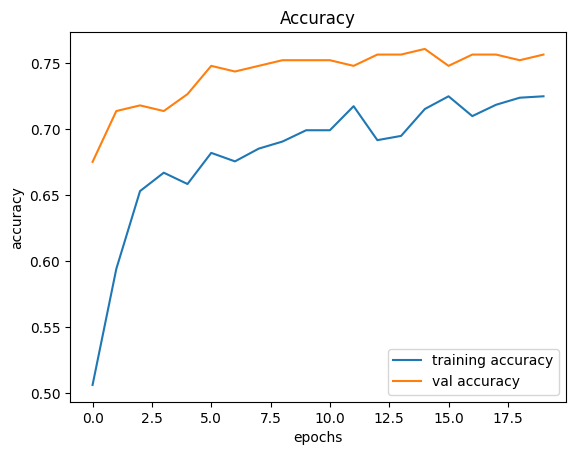

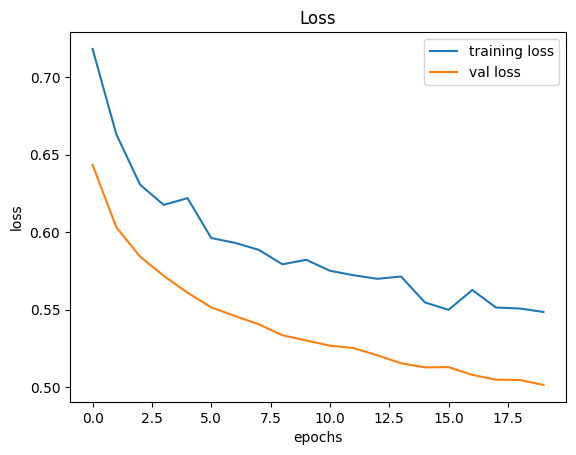

In [9]:
epoch = 20
batch_size =32

# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Train Model
history = model_resamp.fit(train_x, train_y, batch_size= batch_size, callbacks=[callback], epochs=epoch,
               validation_data= (val_x, val_y))

# Display Accuracy and Loss values of Training and Validation data

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [10]:
# Save model
model_resamp.save("VGG-16_new.h5")